In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
df_X = pd.read_csv('./data/logistic_x.txt', sep='\ +', header=None, engine='python')
y = pd.read_csv('./data/logistic_y.txt', sep='\ +', header=None, engine='python')
y = y.astype(int)

In [57]:
df_X['label'] = y[0].values
df_X

,0,1,label
0,1.343250,-1.331148,-1
1,1.820553,-0.634668,-1
2,0.986321,-1.888576,-1
3,1.944373,-1.635452,-1
4,0.976734,-1.353315,-1
...,...,...,...
94,4.774854,0.099415,1
95,5.827485,-0.690058,1
96,2.289474,1.970760,1
97,2.494152,1.415205,1


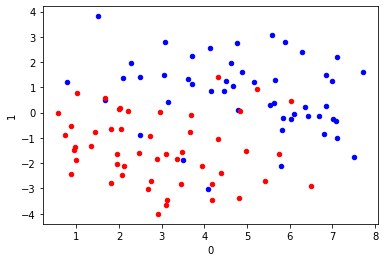

In [58]:
ax = plt.axes()

pos = df_X[df_X.label == 1].iloc[:,[0,1]].plot.scatter(x=0,y=1,ax=ax, color='blue')
neg = df_X[df_X.label == -1].iloc[:,[0,1]].plot.scatter(x=0,y=1,ax=ax, color='red')

#use query
#pos = df_X.query('label == 1').plot.scatter(x=0,y=1,ax=ax, color='blue)

In [59]:
X = df_X[[0,1]].values
X

array([[ 1.3432504 , -1.3311479 ],
       [ 1.8205529 , -0.6346681 ],
       [ 0.98632067, -1.8885762 ],
       [ 1.9443734 , -1.635452  ],
       [ 0.97673352, -1.3533151 ],
       [ 1.9458584 , -2.0443278 ],
       [ 2.1075153 , -2.1256684 ],
       [ 2.070373  , -2.4634101 ],
       [ 0.86864964, -2.4119348 ],
       [ 1.8006594 , -2.7739689 ],
       [ 3.1283787 , -3.4452432 ],
       [ 3.0947429 , -3.6446145 ],
       [ 2.9086652 , -4.0065037 ],
       [ 2.6770338 , -3.0198592 ],
       [ 2.7458671 , -2.7100561 ],
       [ 4.1714647 , -3.4622482 ],
       [ 3.931322  , -2.1099044 ],
       [ 4.378687  , -2.3804743 ],
       [ 4.8016565 , -3.3803344 ],
       [ 4.166105  , -2.8138844 ],
       [ 2.4670141 , -1.6108444 ],
       [ 3.4826743 , -1.5533872 ],
       [ 3.3652482 , -1.8164936 ],
       [ 2.8772788 , -1.8511689 ],
       [ 3.1090444 , -1.6384946 ],
       [ 2.2183701 ,  0.07427956],
       [ 1.9949873 ,  0.16268659],
       [ 2.9500308 ,  0.01687302],
       [ 2.0216009 ,

In [60]:
# add a columns of ones for the intercept terms
X = np.hstack([np.ones((X.shape[0],1)), X])
y = df_X['label'].values
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [61]:
X

array([[ 1.        ,  1.3432504 , -1.3311479 ],
       [ 1.        ,  1.8205529 , -0.6346681 ],
       [ 1.        ,  0.98632067, -1.8885762 ],
       [ 1.        ,  1.9443734 , -1.635452  ],
       [ 1.        ,  0.97673352, -1.3533151 ],
       [ 1.        ,  1.9458584 , -2.0443278 ],
       [ 1.        ,  2.1075153 , -2.1256684 ],
       [ 1.        ,  2.070373  , -2.4634101 ],
       [ 1.        ,  0.86864964, -2.4119348 ],
       [ 1.        ,  1.8006594 , -2.7739689 ],
       [ 1.        ,  3.1283787 , -3.4452432 ],
       [ 1.        ,  3.0947429 , -3.6446145 ],
       [ 1.        ,  2.9086652 , -4.0065037 ],
       [ 1.        ,  2.6770338 , -3.0198592 ],
       [ 1.        ,  2.7458671 , -2.7100561 ],
       [ 1.        ,  4.1714647 , -3.4622482 ],
       [ 1.        ,  3.931322  , -2.1099044 ],
       [ 1.        ,  4.378687  , -2.3804743 ],
       [ 1.        ,  4.8016565 , -3.3803344 ],
       [ 1.        ,  4.166105  , -2.8138844 ],
       [ 1.        ,  2.4670141 , -1.610

In [75]:
all_theta = []
theta = np.zeros(X.shape[1])
tol = 1e9
n_iters = 0
while tol > 1e-6:
    z = y * X.dot(theta)
    gz = 1 / (1 + np.exp(-z))
    dJ_dtheta = np.mean((gz-1)*y*X.T, axis=1)
    
    hessian = np.zeros((X.shape[1],X.shape[1]))
    l_hessian = X.shape[1]
    for i in range(l_hessian):
        for j in range(l_hessian):
            hessian[i][j] = np.mean(gz * (1 - gz) * X[:,i] * X[:,j])
            if i != j:
                hessian[j][i] = hessian[i][j]
    delta = np.linalg.inv(hessian).dot(dJ_dtheta)
    old_theta = theta.copy()
    theta = theta - delta
    all_theta.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations.'.format(n_iters))
            


converged after 7 iterations.


In [76]:
hessian

array([[ 0.10009798,  0.3882034 , -0.02594128],
       [ 0.3882034 ,  1.84012054, -0.17424752],
       [-0.02594128, -0.17424752,  0.18496572]])

In [82]:
a = np.sum(all_theta, axis=1)
c_theta = []
for i in range(len(a)-1):
    c_theta.append(a[i+1]-a[i])
print(c_theta)

[-0.16204825468406303, -0.06282559996709491, -0.009930157568840192, -0.00026544107915449366, -2.3291219330978663e-07, -2.2359891715950653e-13]


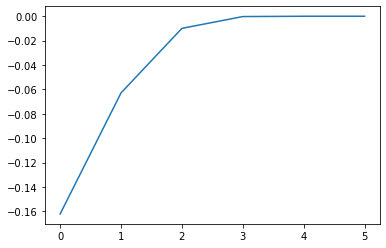

In [85]:
plt.plot(np.array(c_theta))

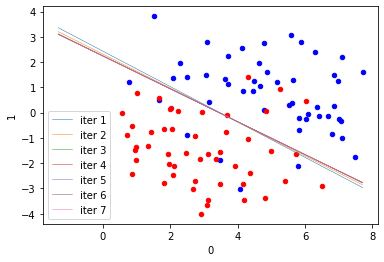

In [89]:
ax = plt.axes()

pos = df_X[df_X.label == 1].iloc[:,[0,1]].plot.scatter(x=0,y=1,ax=ax, color='blue')
neg = df_X[df_X.label == -1].iloc[:,[0,1]].plot.scatter(x=0,y=1,ax=ax, color='red')

_x = np.array([np.min(X[:1]), np.max(X[:,1])])
for k, theta in enumerate(all_theta):
    _y = (theta[0] + theta[1] * _x) / (-theta[2])
    plt.plot(_x, _y, label='iter {0}'.format(k+1), lw=0.5)
plt.legend()